In [14]:
!pip install statsmodels

In [15]:
!pip install wquantiles

In [13]:
import pandas as pd #manipulacion y analisis de datos
import numpy as np #calculos matematicos
from scipy.stats import trim_mean #estadistica
from statsmodels import robust
import wquantiles
import seaborn as sns #graficas bonitas
import matplotlib.pyplot as plt

In [ ]:
estado=pd.read_csv("/content/athlete_events.csv")

In [ ]:
estado.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [ ]:
estado.tail() #MUESTRA LOS 5 ULTIMOS VALORES

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
estado.sample(5) #elige 5 registros al azar y los imprime

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
114567,58006,Tomoe Kato (Sakai-),F,30.0,158.0,50.0,Japan,JPN,2008 Summer,2008,Summer,Beijing,Football,Football Women's Football,NaN
66168,33846,Marinella Falca,F,22.0,167.0,50.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,NaN
161271,80930,Yohannes Mohamed,M,32.0,177.0,55.0,Ethiopia,ETH,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN
194799,97762,Qiao Hong,F,27.0,162.0,62.0,China-1,CHN,1996 Summer,1996,Summer,Atlanta,Table Tennis,Table Tennis Women's Doubles,Gold
267818,133988,Lubomr Zapletal,M,24.0,182.0,81.0,Czechoslovakia,TCH,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Men's Coxed Eights,NaN


In [ ]:
estado.columns #para verificar el nombre de las columbas (features)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
estado.info() #hay que hacerse para saber si hay nulos y si toca limpiar o que cosa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
estado.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
estado["Age"].mean()

25.556898357297374

In [ ]:
trim_mean(estado.Age,0.1) #el 0,1 es cuanto corta de las esquinas en porcentajes

25.2548572113567

In [ ]:
np.average(estado["Age"], weights=estado["Year"])

nan

<Axes: >

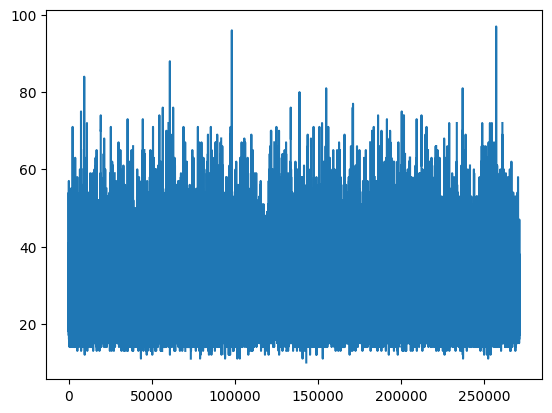

In [ ]:
estado["Age"].plot.line()

<Axes: >

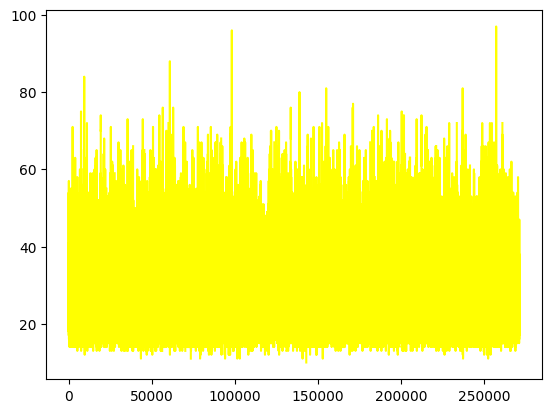

In [ ]:
estado["Age"].plot.line(color="yellow")

<Axes: >

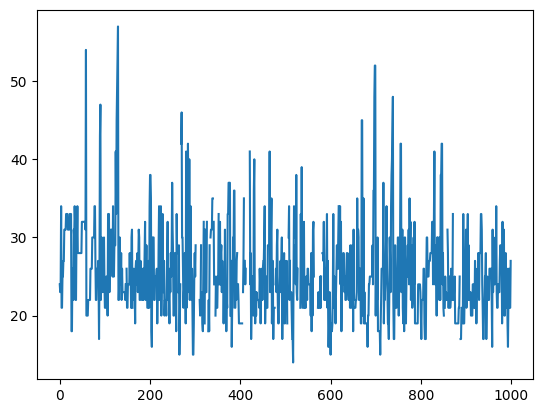

In [ ]:
muestra=estado.head(1000)
muestra["Age"].plot.line()

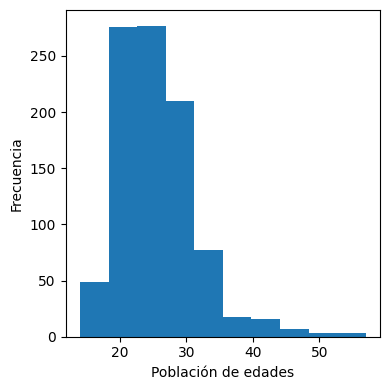

In [ ]:
ax = (muestra["Age"]).plot.hist(figsize=(4,4))
ax.set_xlabel("Población de edades")
ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figur

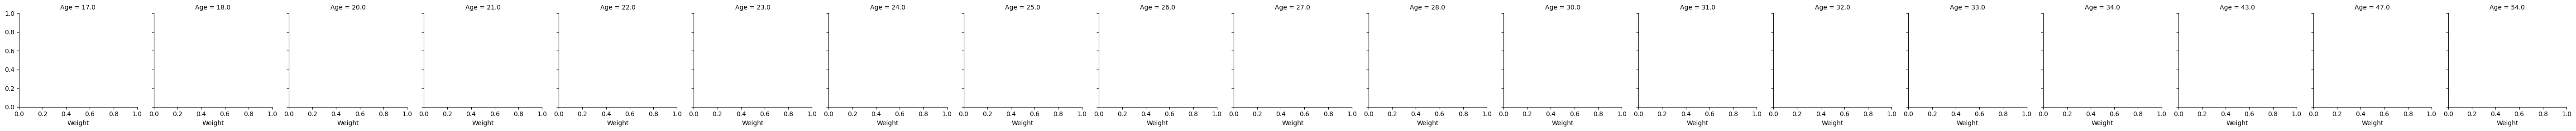

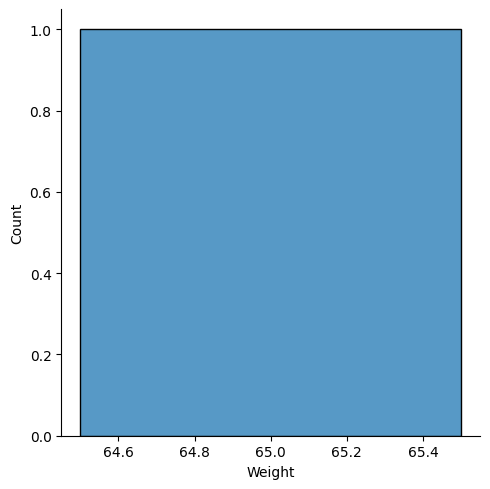

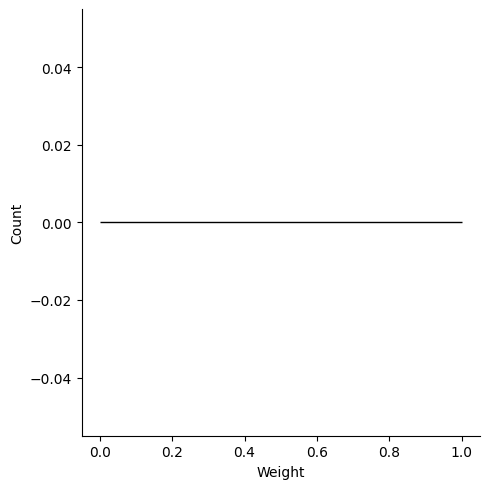

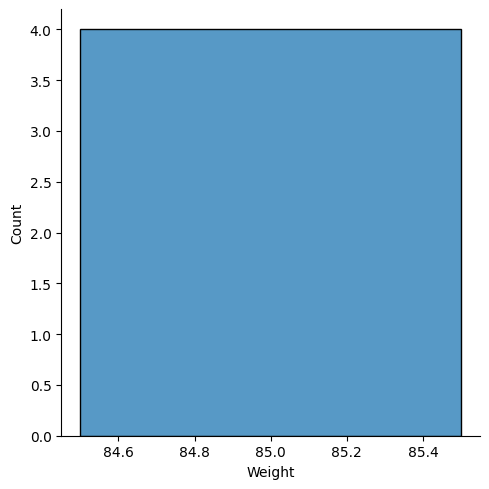

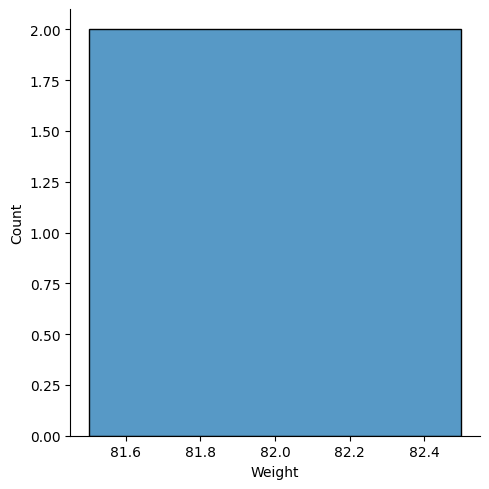

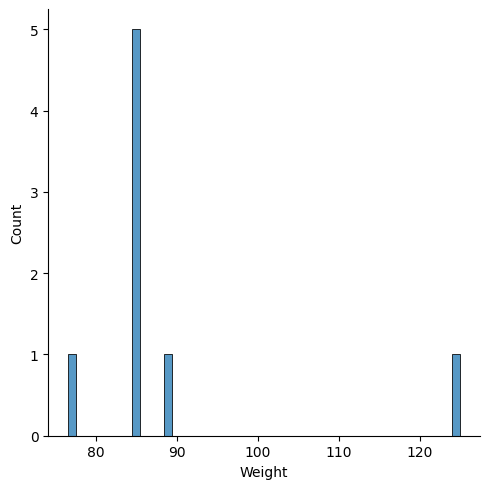

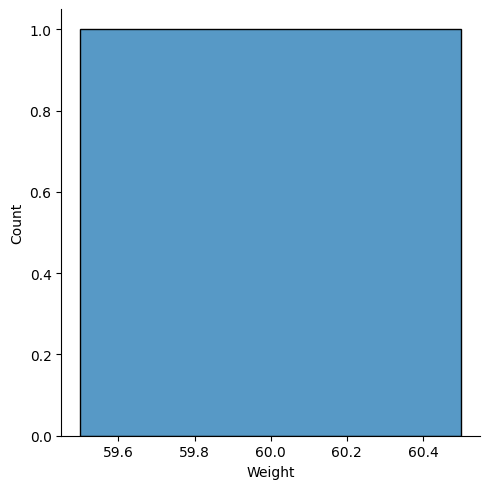

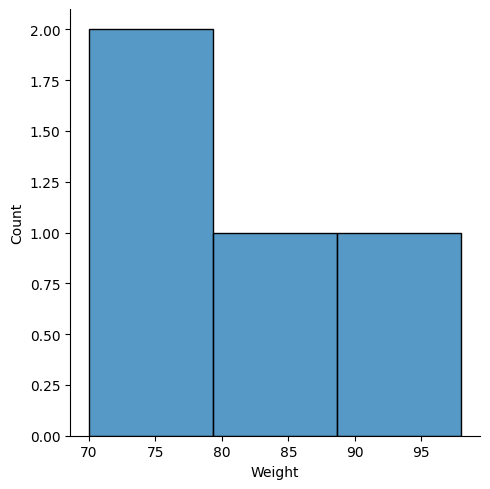

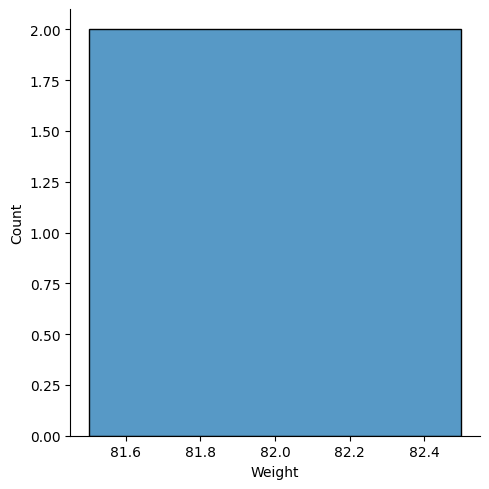

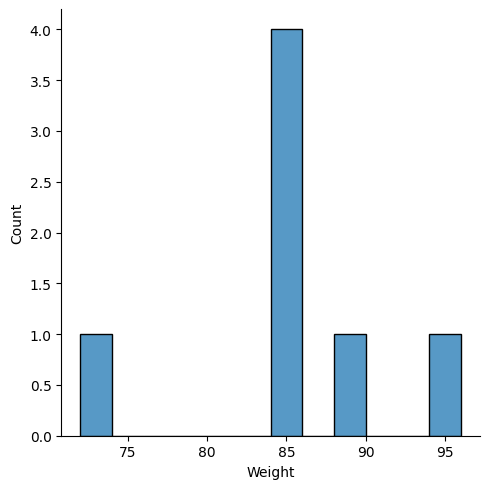

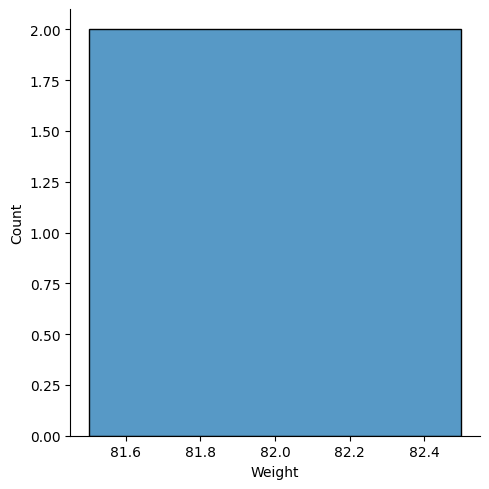

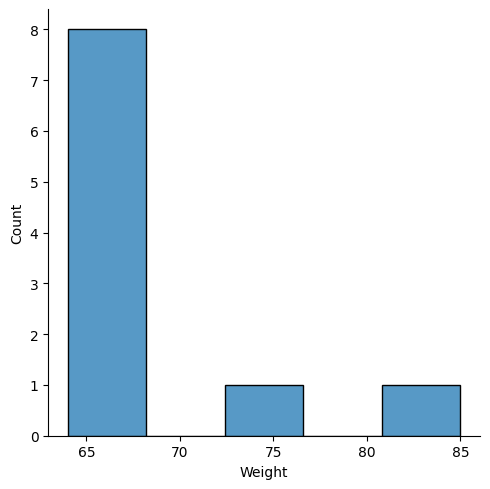

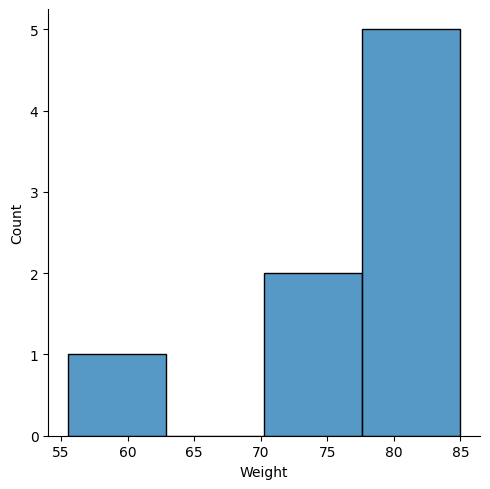

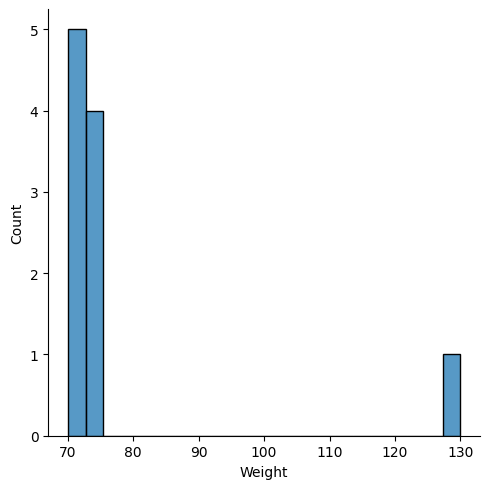

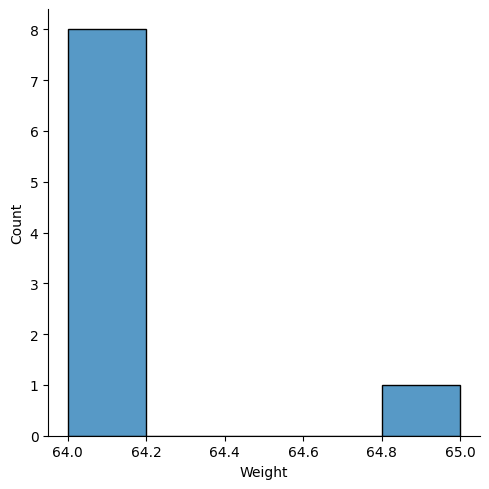

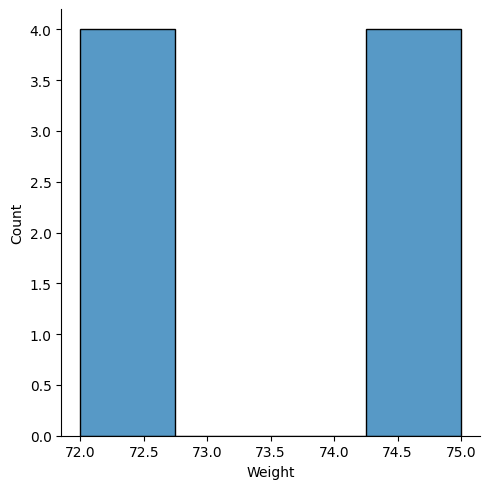

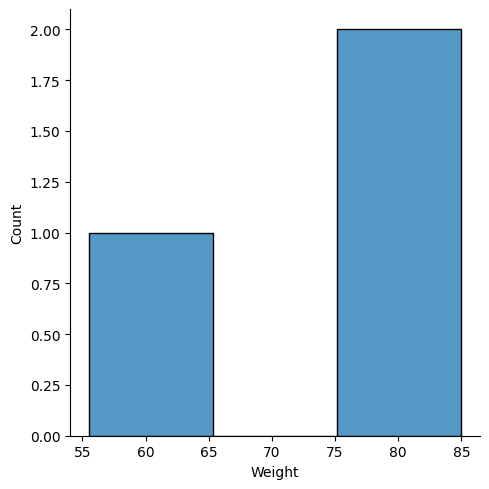

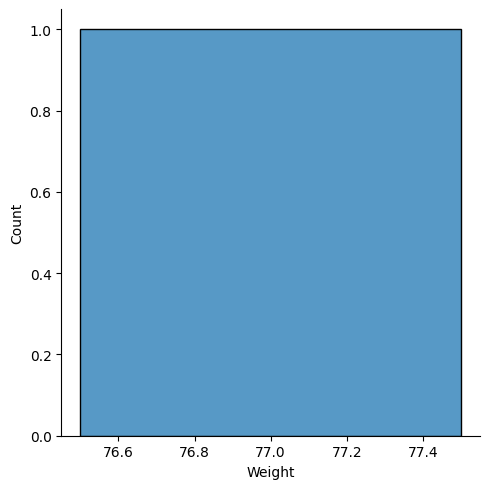

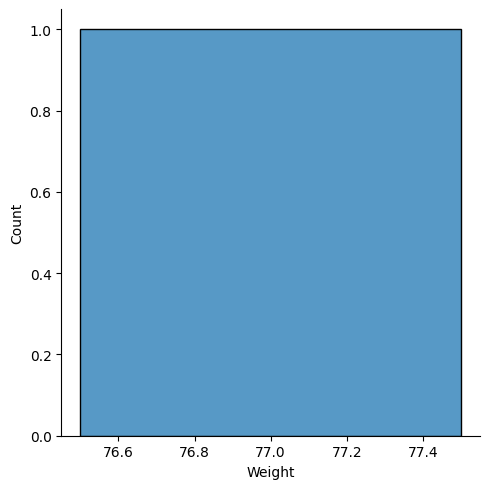

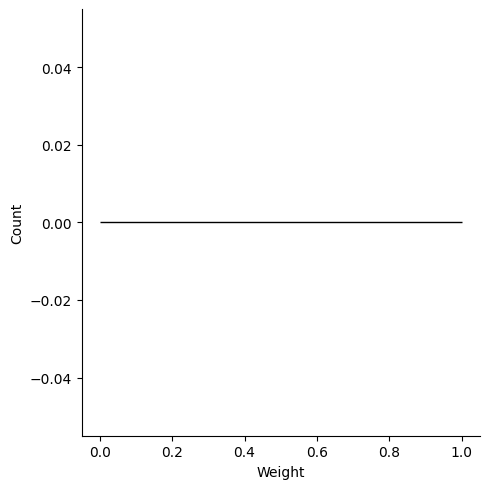

In [ ]:
analisis=estado.head(100)
g=sns.FacetGrid(analisis,col="Age")
g.map(sns.displot,"Weight")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pandas
import pandas as pd # imports the pandas library and assigns the alias 'pd'

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/athlete_events.csv")

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
data["Age"].std()

6.393560847035813

In [6]:
data.Age.quantile(0.75)-data.Age.quantile(0.25)

7.0

In [16]:
robust.scale.mad(data["Age"])

nan

In [17]:
data["Age"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,Age
0.05,18.0
0.25,21.0
0.50,24.0
0.75,28.0
0.95,37.0


Text(0, 0.5, 'Edad en Años')

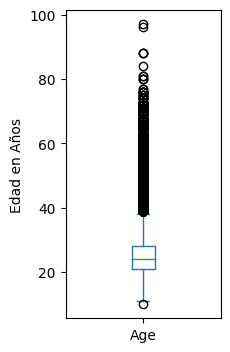

In [19]:
#Dibujando diagramas de caja
ax = (data.Age/1).plot.box(figsize=(2,4))
ax.set_ylabel("Edad en Años")

In [34]:
#Calculando la tabla de frecuencias e histogramas
binnedAge=pd.cut(data["Age"],1)
binnedAge.value_counts()


Text(0, 0.5, 'Población de Edades')

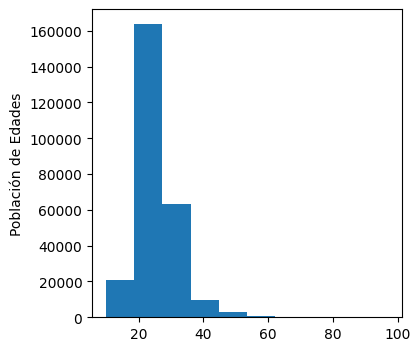

In [36]:
#Histograma de población por estados:
ax = (data.Age/1).plot.hist(figsize=(4,4))
ax.set_ylabel("Población de Edades")

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Text(0.5, 0, 'Tasa por 10000 habitantes')

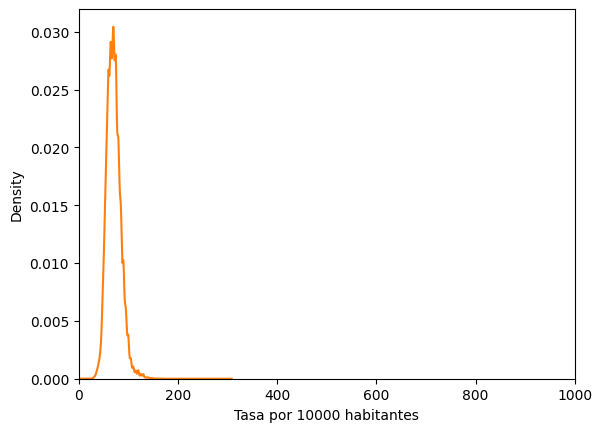

In [43]:
#Diagrama de dispersión y curva de densidad
ax=data["Weight"].plot.hist(density=True,xlim=[0,1000],bins=range(1,12))
data["Weight"].plot.density(ax=ax)
ax.set_xlabel("Tasa por 10000 habitantes")

# Análisis de Distribución de Datos: Desviación Estándar, MAD, IQR y Diagramas de Caja

## Desviación Estándar y MAD
La **desviación estándar (DS)** y la **mediana de las desviaciones absolutas (MAD)** son medidas de dispersión que nos ayudan a entender la variabilidad de los datos. La **DS** es sensible a valores extremos, ya que utiliza el cuadrado de las desviaciones, mientras que la **MAD** es más robusta frente a outliers, al basarse en la mediana de las desviaciones respecto a la mediana de los datos.

Cuando **la desviación estándar es casi el doble que la MAD**, esto sugiere que los datos contienen valores extremos o una mayor dispersión de lo que indica la MAD. En este caso, la desviación estándar está siendo influenciada por valores atípicos.

### ¿Cómo mejorar esta situación?
Para reducir la influencia de los outliers y mejorar la variabilidad de los datos, se pueden aplicar varias estrategias:
1. **Eliminar o investigar valores atípicos.**
2. **Aplicar transformaciones de datos**, como la logarítmica o la raíz cuadrada, para reducir la variabilidad.
3. Utilizar medidas robustas como la **MAD** en lugar de la **DS**, si se busca menor sensibilidad a valores extremos.

## Interpretación del IQR (Rango Intercuartílico)
El **IQR** es la diferencia entre el cuartil 3 (Q3, 75%) y el cuartil 1 (Q1, 25%), y mide la dispersión de la mitad central de los datos.

- Un **IQR amplio** indica mayor dispersión entre el 25% y el 75% de los datos.
- Un **IQR pequeño** indica que los datos están más concentrados en el centro, mostrando menos variabilidad.

## Exploración de la Distribución de Datos
Explorar la distribución de los datos implica analizar cómo están distribuidos los valores. Se puede hacer mediante histogramas, boxplots, y otras medidas de dispersión como la DS y el IQR. En particular, se busca:
1. **Simetría** o si la distribución está sesgada.
2. **Presencia de outliers.**
3. La **forma de la distribución**, como si es normal, sesgada, o tiene múltiples picos.

## Percentiles de la Tasa de Homicidios por Estado
Los **percentiles** dividen los datos en 100 partes, lo que permite observar la distribución de las tasas de homicidios entre los estados. Por ejemplo:
- El **percentil 50 (mediana)** indica que el 50% de los estados tienen tasas de homicidios menores o iguales a ese valor, y el otro 50% tienen tasas más altas.
- Los percentiles más bajos (10%, 25%) muestran estados con tasas de homicidios más bajas, mientras que los más altos (75%, 90%) reflejan los estados con tasas más altas.

## Diagrama de Caja (Boxplot) de Tasa de Homicidios
El **diagrama de caja** (boxplot) proporciona una visualización clara de la distribución de los datos:
- La **mediana** (línea dentro de la caja) muestra el valor central.
- El **IQR** (la caja) indica la dispersión de la mitad central de los datos.
- Los **bigotes** muestran la variabilidad fuera del IQR.
- Los **outliers** aparecen como puntos fuera de los bigotes.

En el contexto de tasas de homicidios, el boxplot permite visualizar qué estados tienen tasas especialmente altas (outliers) y cómo se distribuyen la mayoría de los estados.

## Agregar Estados a los Intervalos
Para agrupar los estados en intervalos, como cuartiles, se pueden clasificar manualmente según su posición en la distribución. Esto se puede lograr calculando los percentiles y asignando cada estado a un cuartil específico.

### Interpretación:
- Si la mayoría de los estados están en el primer cuartil (Q1), eso indica que la mayoría tiene tasas de homicidios bajas.
- Los **outliers hacia arriba** sugieren que algunos estados tienen tasas significativamente más altas que la media.

## Diagrama de Dispersión
El **diagrama de dispersión** muestra la relación entre dos variables. Puede identificar correlaciones o tendencias. Por ejemplo, si uno de los ejes representa la tasa de homicidios y el otro el ingreso per cápita, se puede analizar si existe alguna relación entre ambas variables.

- Si los puntos forman una línea ascendente, hay una **correlación positiva**.
- Si los puntos están dispersos sin patrón, no hay relación clara.

### Interpretación del Diagrama de Dispersión
Un diagrama de dispersión permite visualizar si existe una tendencia entre las dos variables, así como identificar outliers o patrones interesantes.
